In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the training data and look at the first 10 rows
originalTrain = pd.read_csv('train.csv')
originalTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#looking at the number of feature's non-null values and type
originalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#seeing the total null values for each feature
originalTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#checking the number of unique values for each feature
originalTrain.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
#checking the unique feature values for Embarked
originalTrain['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
#check the rows where Embarked is unknown
originalTrain.loc[originalTrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


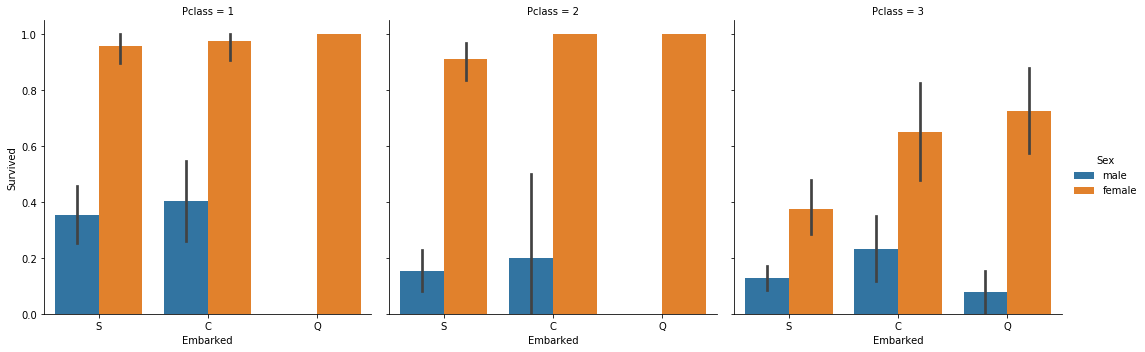

In [7]:
#Likelihood of survival for the different travel classes based on embarked location and sex
sns.factorplot(x = 'Embarked', y = 'Survived', data = originalTrain, kind = 'bar', hue = 'Sex', col = 'Pclass')

In [8]:
#at some point, seeing if I can apply a good algorithm to test this!!! (possibly a regression to predic these?)
#for now, classifying the two unknown Embarked values as Q based on the above graph
originalTrain.at[61, 'Embarked'] =  'Q'
originalTrain.at[829, 'Embarked'] = 'Q'
originalTrain['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
#producing a feature with solely the cabin letters
originalTrain['Cabin Letter'] = [x[0] if type(x)== str else float('nan') for x in originalTrain['Cabin']]
originalTrain['Cabin Letter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

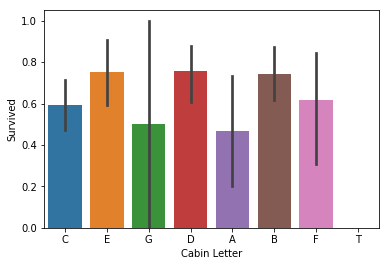

In [10]:
#probability of survival based on Cabin Letter
sns.barplot(x='Cabin Letter',y='Survived',data=originalTrain)

In [11]:
#see if there is a way to deal with Cabin Letter later on rather than just dropping!!!
manipTrain = originalTrain.drop(['Cabin Letter','Cabin','PassengerId'], axis = 1)

In [12]:
manipTrain.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [13]:
#can see about bucketing the Ticket into discrete classes!!!
manipTrain.drop('Ticket', axis = 1, inplace = True)

In [14]:
#change Sex into binary classifier with male as 1 and female as 0
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
sex1hot = encoder.fit_transform(manipTrain['Sex'])

In [15]:
#add the array with binary classification of male and female to the training set
manipTrain['Binary Sex'] = sex1hot
#confirm that binary classification of sex was performed correctly
manipTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [16]:
#From Name feature, extract the Title of the individual
manipTrain['Title'] = [line.split(",")[1].split(".")[0][1:] for line in manipTrain['Name']]
manipTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr


In [17]:
#all unique values for the Title feature
manipTrain['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
#checking the number of unique values in Title feature
manipTrain['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Nobility      5
Military      5
Name: Title, dtype: int64

In [18]:
#drop the original Name feature
manipTrain.drop('Name', axis = 1, inplace = True)

In [19]:
#find the row that uses the Countess as its value for the Title feature
manipTrain.loc[manipTrain['Title'] == 'the Countess']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
759,1,1,female,33.0,0,0,86.5,S,0,the Countess


In [20]:
#find the indices where the value for Title is the Countess
countess = manipTrain.index[manipTrain['Title'] == 'the Countess'].tolist()
print(countess)

[759]


In [21]:
#recategorizing some of the values from Title feature
for i in countess:
    manipTrain.at[i, 'Title'] = 'Nobility'
jonkheer = manipTrain.index[manipTrain['Title'] == 'Jonkheer'].tolist()
for i in jonkheer:
    manipTrain.at[i, 'Title'] = 'Nobility'
mme = manipTrain.index[manipTrain['Title'] == 'Mme'].tolist()
for i in mme:
    manipTrain.at[i, 'Title'] = 'Mrs'
mlle = manipTrain.index[manipTrain['Title'] == 'Mlle'].tolist()
for i in mlle:
    manipTrain.at[i, 'Title'] = 'Miss'
ms = manipTrain.index[manipTrain['Title'] == 'Ms'].tolist()
for i in ms:
    manipTrain.at[i, 'Title'] = 'Miss'
don = manipTrain.index[manipTrain['Title'] == 'Don'].tolist()
for i in don:
    manipTrain.at[i, 'Title'] = 'Nobility'
lady = manipTrain.index[manipTrain['Title'] == 'Lady'].tolist()
for i in lady:
    manipTrain.at[i, 'Title'] = 'Nobility'
sir = manipTrain.index[manipTrain['Title'] == 'Sir'].tolist()
for i in sir:
    manipTrain.at[i, 'Title'] = 'Nobility'
capt = manipTrain.index[manipTrain['Title'] == 'Capt'].tolist()
for i in capt:
    manipTrain.at[i, 'Title'] = 'Military'
major = manipTrain.index[manipTrain['Title'] == 'Major'].tolist()
for i in major:
    manipTrain.at[i, 'Title'] = 'Military'
col = manipTrain.index[manipTrain['Title'] == 'Col'].tolist()
for i in col:
    manipTrain.at[i, 'Title'] = 'Military'

In [22]:
#checking the number of unique values in Title feature
manipTrain['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Nobility      5
Military      5
Name: Title, dtype: int64

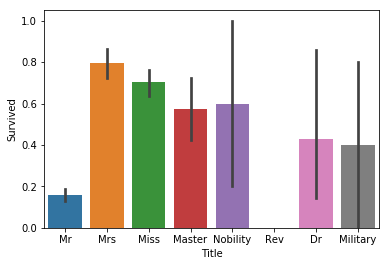

In [23]:
#bar plot of Title and probability of Survival
sns.barplot(x='Title',y='Survived',data=manipTrain)

In [24]:
manipTrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,1,1,female,38.0,1,0,71.2833,C,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,Mr
5,0,3,male,NaN,0,0,8.4583,Q,1,Mr
6,0,1,male,54.0,0,0,51.8625,S,1,Mr
7,0,3,male,2.0,3,1,21.0750,S,1,Master
8,1,3,female,27.0,0,2,11.1333,S,0,Mrs
9,1,2,female,14.0,1,0,30.0708,C,0,Mrs


In [26]:
#dropping the original Sex feature
manipTrain.drop('Sex',axis = 1, inplace = True)

In [27]:
#seeing the total null values for each feature
manipTrain.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
Binary Sex      0
Title           0
dtype: int64

In [28]:
#description of each feature in manipTrain dataframe
manipTrain.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Binary Sex
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [29]:
#drop Survived feature for training
preTrain = manipTrain.drop('Survived',axis=1)

In [30]:
preTrain.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,22.0,1,0,7.2500,S,1,Mr
1,1,38.0,1,0,71.2833,C,0,Mrs
2,3,26.0,0,0,7.9250,S,0,Miss
3,1,35.0,1,0,53.1000,S,0,Mrs
4,3,35.0,0,0,8.0500,S,1,Mr


In [31]:
#taken from https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/
#import necessary libaries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Imputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline

In [33]:
#Imputer adds median value to null values in Age feature
#StandardScaler standardizes the Age and Fare features
#OneHotEncoder, ignore previously unseen values when transforming the test set; add columns to turn
#the categorical values from binary features
preprocess = make_column_transformer(
    (['Age','Fare'], make_pipeline(Imputer(strategy='median'),StandardScaler())),
    (['Pclass','SibSp','Parch','Embarked','Binary Sex','Title'], OneHotEncoder(handle_unknown='ignore'))
)
preprocess.fit_transform(preTrain).toarray()[:5]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:732: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-0.56573646, -0.50244517,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.66386103,  0.78684529,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.48885426,  0.        ,  0.    

In [34]:
#create a pipeline with the preprocessing from above and using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = make_pipeline(
    preprocess,
    LogisticRegression())

In [35]:
#train the model and test it on the validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preTrain, manipTrain['Survived'], random_state=0)
model.fit(X_train, y_train)
print("logistic regression score: %f" % model.score(X_test, y_test))

logistic regression score: 0.807175


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#import test data
testData = pd.read_csv('test.csv')
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
#remove same features as training set
preTest = testData.drop(['PassengerId','Cabin','Ticket'],axis = 1)

In [38]:
#change Sex into binary classifier with male as 1 and female as 0; use encoder from training set
testsex1hot = encoder.transform(preTest['Sex'])
preTest['Binary Sex'] = testsex1hot
preTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [39]:
#drop original Sex feature
preTest.drop('Sex', axis=1, inplace = True)

In [40]:
preTest['Title'] = [line.split(",")[1].split(".")[0][1:] for line in preTest['Name']]
preTest.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,Q,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0,Mrs
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,1,Mr
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0,Mrs


In [41]:
preTest.drop('Name',axis=1,inplace=True)
preTest.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,34.5,0,0,7.8292,Q,1,Mr
1,3,47.0,1,0,7.0000,S,0,Mrs
2,2,62.0,0,0,9.6875,Q,1,Mr
3,3,27.0,0,0,8.6625,S,1,Mr
4,3,22.0,1,1,12.2875,S,0,Mrs


In [ ]:
'''
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Nobility      5
Military      5
'''

In [42]:
preTest['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [46]:
#recategorizing some of the values from Title feature
ms = preTest.index[preTest['Title'] == 'Ms'].tolist()
for i in ms:
    preTest.at[i, 'Title'] = 'Miss'
dona = preTest.index[preTest['Title'] == 'Dona'].tolist()
for i in dona:
    preTest.at[i, 'Title'] = 'Nobility'
col = preTest.index[preTest['Title'] == 'Col'].tolist()
for i in col:
    preTest.at[i, 'Title'] = 'Military'

In [47]:
preTest['Title'].value_counts()

Mr          240
Miss         79
Mrs          72
Master       21
Military      2
Rev           2
Dr            1
Nobility      1
Name: Title, dtype: int64

In [48]:
#check the features with null values
preTest.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Binary Sex     0
Title          0
dtype: int64

In [49]:
#use the preprocess from the training set
preprocess.transform(preTest).toarray()[:5]

array([[ 0.36880494, -0.48512409,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.33341615, -0.50151335,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 2.4909496 , -0.44839451,  0.        ,  1.    

In [50]:
#predict the Survival feature based on the test data
logreg_predict = model.predict(preTest)

In [51]:
#reshape the dimensions into a 418*1 array
logreg_predicts = np.reshape(logreg_predict, (-1, 1))
logreg_predicts.shape

(418, 1)

In [52]:
#prepare for Kaggle submission
testFinal = testData[['PassengerId']]
testFinal['Survived'] = logreg_predicts

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
testFinal.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [54]:
testFinal.to_csv('2019TitanicLogReg.csv', index = False)
#score currently 0.78468 (correct Survival prediction of 78.468%)

In [ ]:
#look to do GridSearchCV and RandomizedSearchCV
#look to add SVM and RandomForestClassifier
#look to do ensemble
#look to do PCA/LDA?